<a href="https://colab.research.google.com/github/gopalsakarkargit/Curtin-Uiniveristy-Export-Prediction/blob/main/Malayasia_Pacific_Industry_Berhad_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv("/content/Malaysia Pacific Indu.Berhad SC.csv")
data.head()

,Date,Open,High,Low,Adj Close,Volume,GDP,Balance of trade,Total Population,Total cases,Total deaths,People Vaccinated,Uncertainty index,MYR/USD,Unemployment rate,Inflation rate,Interest rate,FTSE Bursa Malaysia KLCI,WTI Crude Oil,Brent Crude Oil
0,02-01-2019,9.90,9.90,9.81,9.312161,11600,342400000000,11514200000,31949777,0,0,0,0.15868,0.242160,0.033,-0.005,0.0318,1668.109985,46.31,54.06
1,03-01-2019,9.85,9.90,9.78,9.283771,20600,342400000000,11514200000,31949777,0,0,0,0.15868,0.241838,0.033,-0.005,0.0324,1675.829956,46.92,53.23
2,04-01-2019,9.81,9.81,9.65,9.132353,74400,342400000000,11514200000,31949777,0,0,0,0.15868,0.241546,0.033,-0.005,0.0320,1669.780029,47.76,55.64
3,07-01-2019,9.79,9.97,9.75,9.312161,122700,342400000000,11514200000,31949777,0,0,0,0.15868,0.242601,0.033,-0.005,0.0318,1679.170044,48.27,57.10
4,08-01-2019,9.89,10.28,9.89,9.596069,144700,342400000000,11514200000,31949777,0,0,0,0.15868,0.243173,0.033,-0.005,0.0318,1672.760010,49.58,56.91


In [ ]:
data.shape

(737, 20)

In [ ]:
data.dtypes

Date                         object
Open                        float64
High                        float64
Low                         float64
Adj Close                   float64
Volume                        int64
GDP                           int64
Balance of trade              int64
Total Population              int64
Total cases                   int64
Total deaths                  int64
People Vaccinated             int64
Uncertainty index           float64
MYR/USD                     float64
Unemployment rate           float64
Inflation rate              float64
Interest rate               float64
FTSE Bursa Malaysia KLCI    float64
WTI Crude Oil               float64
Brent Crude Oil             float64
dtype: object

In [ ]:
data.isnull().sum()

Date                         0
Open                         0
High                         0
Low                          0
Adj Close                    0
Volume                       0
GDP                          0
Balance of trade             0
Total Population             0
Total cases                  0
Total deaths                 0
People Vaccinated            0
Uncertainty index            0
MYR/USD                      1
Unemployment rate            0
Inflation rate               0
Interest rate                0
FTSE Bursa Malaysia KLCI     2
WTI Crude Oil               23
Brent Crude Oil             12
dtype: int64

In [ ]:
data = data.interpolate(method = 'spline', order = 3)
display(data.isna().sum())

Date                        0
Open                        0
High                        0
Low                         0
Adj Close                   0
Volume                      0
GDP                         0
Balance of trade            0
Total Population            0
Total cases                 0
Total deaths                0
People Vaccinated           0
Uncertainty index           0
MYR/USD                     0
Unemployment rate           0
Inflation rate              0
Interest rate               0
FTSE Bursa Malaysia KLCI    0
WTI Crude Oil               0
Brent Crude Oil             0
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

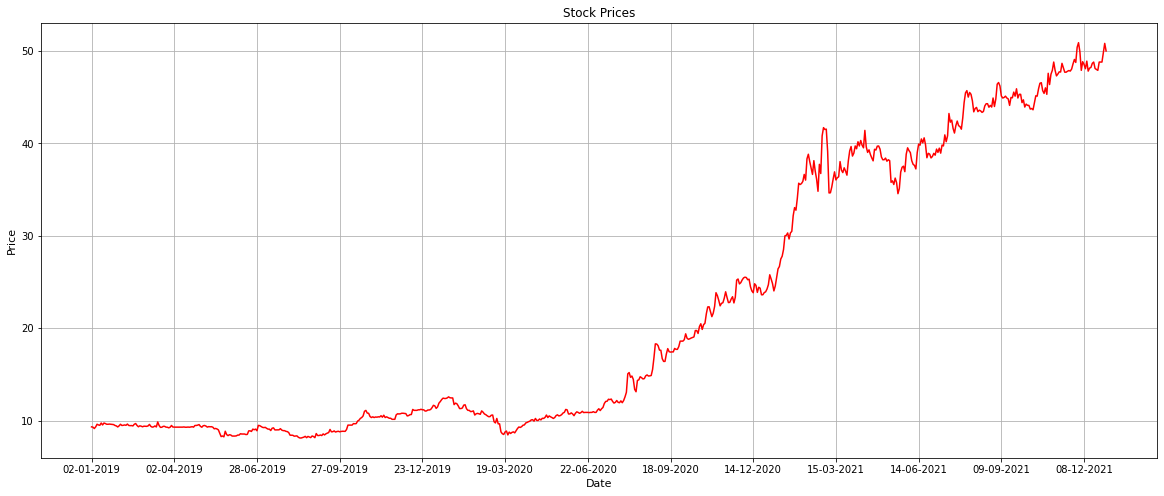

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'],data['Adj Close'],color='Red')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Price',fontsize='11')
plt.title('Stock Prices')
plt.grid()
plt.show()

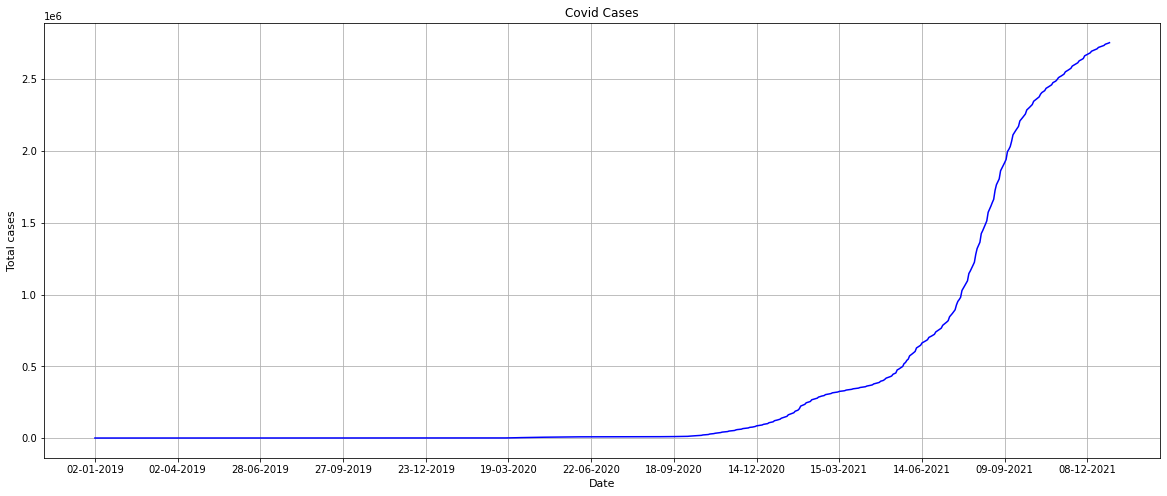

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(data['Date'],data['Total cases'],color='Blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Total cases',fontsize='11')
plt.title('Covid Cases')
plt.grid()
plt.show()

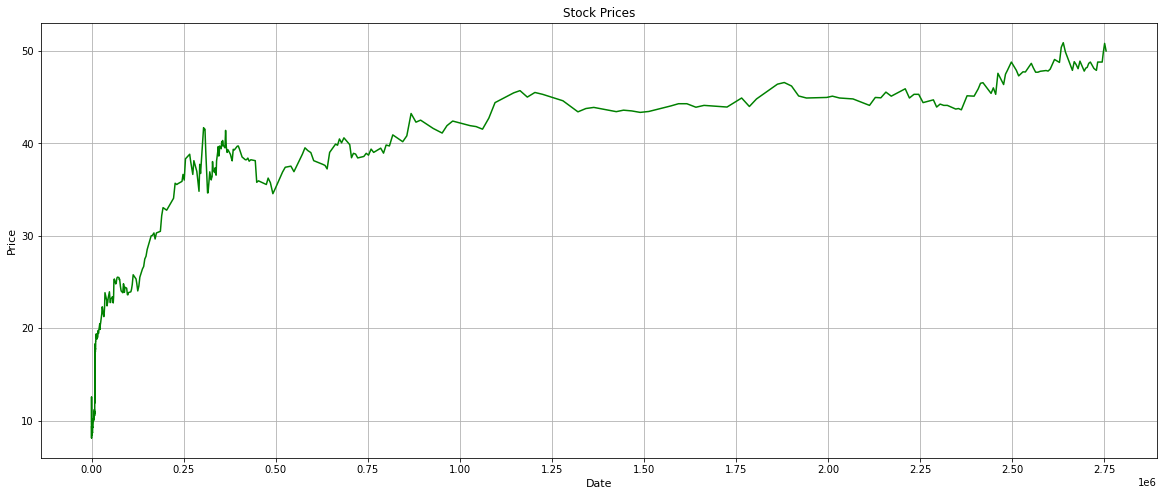

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(data['Total cases'],data['Adj Close'],color='green')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Date',fontsize='11')
ax.set_ylabel('Price',fontsize='11')
plt.title('Stock Prices')
plt.grid()
plt.show()

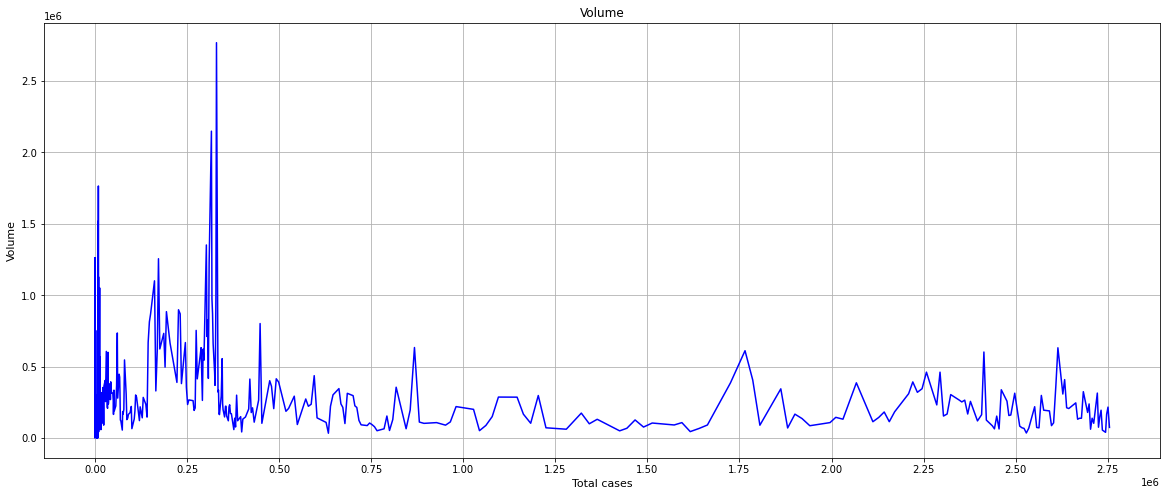

In [ ]:
fig,ax = plt.subplots(figsize=(20,8))
ax.plot(data['Total cases'],data['Volume'],color='Blue')
ax.xaxis.set_major_locator(plt.MaxNLocator(15))
ax.set_xlabel('Total cases',fontsize='11')
ax.set_ylabel('Volume',fontsize='11')
plt.title('Volume')
plt.grid()
plt.show()

In [ ]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date',inplace=True)

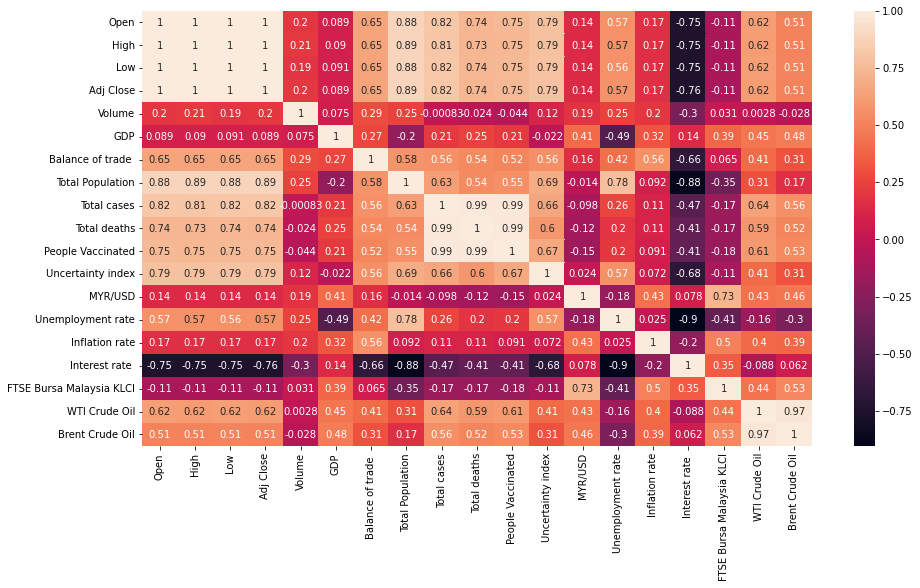

In [ ]:
# correlation between attributes and target variable
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot = True)
plt.show()

In [ ]:
!pip install Boruta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
#define the features
X = data.iloc[:,data.columns!="Adj Close"].values
y = data.iloc[:,4].values
forest = RandomForestClassifier(n_estimators=1000, n_jobs=-1, class_weight='balanced')

# define Boruta feature selection method
feat_selector = BorutaPy(forest, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
Iteration: 	9 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
Iteration: 	10 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
Iteration: 	11 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
Iteration: 	12 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
Iteration: 	13 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
Iteration: 	14 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
Iteration: 	15 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
Iteration: 	16 / 100
Confirmed: 	0
Tentative: 	1
Rejected: 	17
I

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced',
                                          n_estimators=14, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7F78474EDD10),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7F78474EDD10, verbose=2)

In [ ]:
# select the top 10 features
top_features = data.columns[data.columns!="Adj Close"][feat_selector.ranking_ <= 10].tolist()
top_features

['Open',
 'High',
 'Low',
 'Volume',
 'MYR/USD',
 'Interest rate ',
 'FTSE Bursa Malaysia KLCI',
 'WTI Crude Oil',
 'Brent Crude Oil']

In [ ]:
X_top = data[top_features]
y = data['Adj Close']

In [ ]:
# new dataset
new_data = pd.concat([pd.DataFrame(X_top), pd.DataFrame(y)], axis=1)
new_data.columns =['Open',
 'High',
 'Low',
 'Adj Close',
 'Volume',
 'MYR/USD',
 'Total cases ',
 'FTSE Bursa Malaysia KLCI',
 'WTI Crude Oil',
 'Brent Crude Oil']
new_data.shape

(737, 10)

In [ ]:
new_data.head()

,Open,High,Low,Adj Close,Volume,MYR/USD,Total cases,FTSE Bursa Malaysia KLCI,WTI Crude Oil,Brent Crude Oil
Date,,,,,,,,,,
2019-02-01,9.90,9.90,9.81,11600,0.242160,0.0318,1668.109985,46.31,54.06,9.312161
2019-03-01,9.85,9.90,9.78,20600,0.241838,0.0324,1675.829956,46.92,53.23,9.283771
2019-04-01,9.81,9.81,9.65,74400,0.241546,0.0320,1669.780029,47.76,55.64,9.132353
2019-07-01,9.79,9.97,9.75,122700,0.242601,0.0318,1679.170044,48.27,57.10,9.312161
2019-08-01,9.89,10.28,9.89,144700,0.243173,0.0318,1672.760010,49.58,56.91,9.596069


In [ ]:
new_data.tail()

,Open,High,Low,Adj Close,Volume,MYR/USD,Interest rate,FTSE Bursa Malaysia KLCI,WTI Crude Oil,Brent Crude Oil
Date,,,,,,,,,,
2021-12-24,48.799999,48.900002,48.680000,55600,0.238209,0.0175,1516.449951,74.394564,75.240000,48.799999
2021-12-27,48.799999,48.820000,48.560001,40000,0.238521,0.0172,1533.910034,75.490000,77.303576,48.799999
2021-12-28,48.980000,50.000000,48.880001,166600,0.239177,0.0173,1539.890015,76.010000,78.176750,49.799999
2021-12-29,49.980000,51.279999,49.119999,216600,0.239320,0.0175,1545.040039,76.580000,78.630000,50.820000
2021-12-30,50.820000,50.820000,49.700001,74400,0.239263,0.0175,1543.609985,76.830000,78.610000,50.000000


In [ ]:
new_data.to_csv('new_data.csv')

In [ ]:
from google.colab import files
files.download('new_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import math

In [ ]:
data1 = data.filter(['Close'])
dataset = data1.values
train_len = math.ceil(len(dataset)*8)
train_len

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

In [ ]:
train_data = scaled_data[0:train_len,:]
x_train = []
y_train = []
for i in range(60,len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=60:
    print(x_train)
    print(y_train)
    print()

In [ ]:
x_train,y_train = np.array(x_train),np.array(y_train)

In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

In [ ]:
model = Sequential()
model.add(LSTM(64,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(64,return_sequences=False))
model.add(Dense(32))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=1,epochs=10)

In [ ]:
test_data = scaled_data[train_len-60:,:]
x_test = []
y_test = dataset[train_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
test_data

In [ ]:
x_test = np.array(x_test)

In [ ]:
#x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape